In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


(60000, 28, 28)
(60000,)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
mod = Sequential()
mod.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
mod.add(MaxPooling2D(pool_size=(2,2)))
mod.add(Dropout(0.25))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dropout(0.5))
mod.add(Dense(10,activation='softmax'))

op = 'adam'
loss = 'categorical_crossentropy'
met = ['accuracy']
mod.compile(optimizer=op,loss=loss,metrics=met)

In [28]:
ep = 10
bat = 128
his = mod.fit(x_train,y_train,batch_size=bat,epochs=ep)

Epoch 1/10
469/469 [==============================] - 61s 125ms/step - loss: 0.5893 - accuracy: 0.7928
Epoch 2/10
469/469 [==============================] - 58s 124ms/step - loss: 0.3886 - accuracy: 0.8641
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.3422 - accuracy: 0.8791
Epoch 4/10
469/469 [==============================] - 58s 124ms/step - loss: 0.3159 - accuracy: 0.8873
Epoch 5/10
469/469 [==============================] - 58s 123ms/step - loss: 0.2971 - accuracy: 0.8925
Epoch 6/10
469/469 [==============================] - 60s 128ms/step - loss: 0.2839 - accuracy: 0.8970
Epoch 7/10
469/469 [==============================] - 57s 122ms/step - loss: 0.2726 - accuracy: 0.9006
Epoch 8/10
469/469 [==============================] - 56s 119ms/step - loss: 0.2592 - accuracy: 0.9057
Epoch 9/10
469/469 [==============================] - 56s 119ms/step - loss: 0.2517 - accuracy: 0.9073
Epoch 10/10
469/469 [==============================] - 56s 119ms/step - l

In [31]:
test_loss, test_acc = mod.evaluate(x_test,y_test)
print(test_acc)


pred = mod.predict(x_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.2443 - accuracy: 0.9123
0.9122999906539917
313/313 [==============================] - 4s 12ms/step


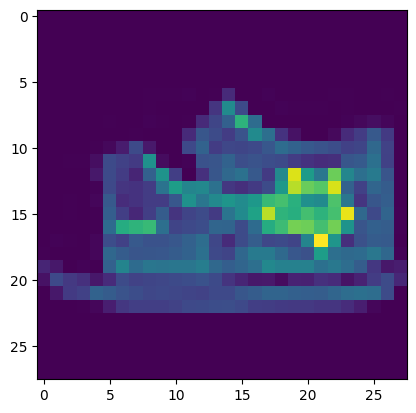

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9999])

In [50]:
import numpy as np
cl = ['Футболка','Брюки','Пуловер','Платье','Пальто','Сандали','Рубашка','Кроссовки','Сумка','Ботинки']
n = 893
cli = np.argmax(pred[n])
print(cl[cli])
cyt = np.argmax(y_test[n])
print(cl[cyt])

Пальто
Пуловер
